# Data Analysis

In [1]:
import configuration
from data_loading import load_data
from utils.plotting import plot_column, plot_correlation_matrix

In [2]:
data = load_data()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1883 non-null   datetime64[ns]
 1   EMP     1883 non-null   float64       
 2   PE      1883 non-null   float64       
 3   CAPE    1883 non-null   float64       
 4   DY      1883 non-null   float64       
 5   Rho     1883 non-null   float64       
 6   MOV     1883 non-null   float64       
 7   IR      1883 non-null   float64       
 8   RR      1883 non-null   float64       
 9   Y02     1883 non-null   float64       
 10  Y10     1883 non-null   float64       
 11  STP     1883 non-null   float64       
 12  CF      1883 non-null   float64       
 13  MG      1883 non-null   float64       
 14  RV      1883 non-null   float64       
 15  ED      1883 non-null   float64       
 16  UN      1883 non-null   float64       
 17  GDP     1883 non-null   float64       
 18  M2      

In [4]:
data.describe()

,Date,EMP,PE,CAPE,DY,Rho,MOV,IR,RR,Y02,...,YSS,NYF,_AU,_DXY,_LCP,_TY,_OIL,_MKT,_VA,_GR
count,1883,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,2006-04-23 00:00:00,0.045090,20.461922,24.866112,2.096219,-0.045687,93.351992,2.917065,-0.001434,3.444789,...,0.113455,10.534681,858.501360,92.255931,4708.296617,373.165669,49.147509,5144.274180,7199.724048,6044.676209
min,1988-04-10 00:00:00,-0.018154,10.400000,11.142000,1.080000,-0.753000,37.000000,-0.013000,-2.240000,0.109000,...,0.004040,0.206785,253.950000,71.660000,1332.750000,94.239000,10.780000,395.300000,823.219000,461.176000
25%,1997-04-16 12:00:00,0.026772,17.500000,19.979000,1.710000,-0.339500,73.150000,0.232000,-1.714000,0.950000,...,0.039614,1.479187,364.725000,84.465000,2230.050000,199.495500,21.080000,1871.695000,3126.783000,2083.886000
50%,2006-04-23 00:00:00,0.040982,19.900000,24.379000,2.000000,-0.133000,93.600000,2.686000,-0.300000,3.330000,...,0.073248,6.136519,578.500000,92.440000,4274.750000,335.855000,44.260000,3415.270000,5289.665000,3577.308000
75%,2015-04-29 12:00:00,0.056003,23.000000,28.104000,2.300000,0.308000,110.300000,5.087000,1.541000,5.442000,...,0.142076,16.917480,1303.790000,98.265000,7082.500000,557.406500,71.950000,7207.485000,10459.936500,7521.199500
max,2024-05-05 00:00:00,0.132654,36.500000,43.817000,3.890000,0.704000,264.600000,9.370000,3.487000,9.873000,...,0.787720,68.221430,2412.970000,119.900000,10702.000000,738.148000,145.660000,20622.830000,23532.827000,29244.203000
std,NaN,0.028162,4.618478,6.633561,0.601455,0.396754,27.904082,2.468363,1.665976,2.527123,...,0.114168,11.647635,571.949036,9.897376,2658.762340,185.081622,29.596379,4769.526062,5622.489863,6434.913341


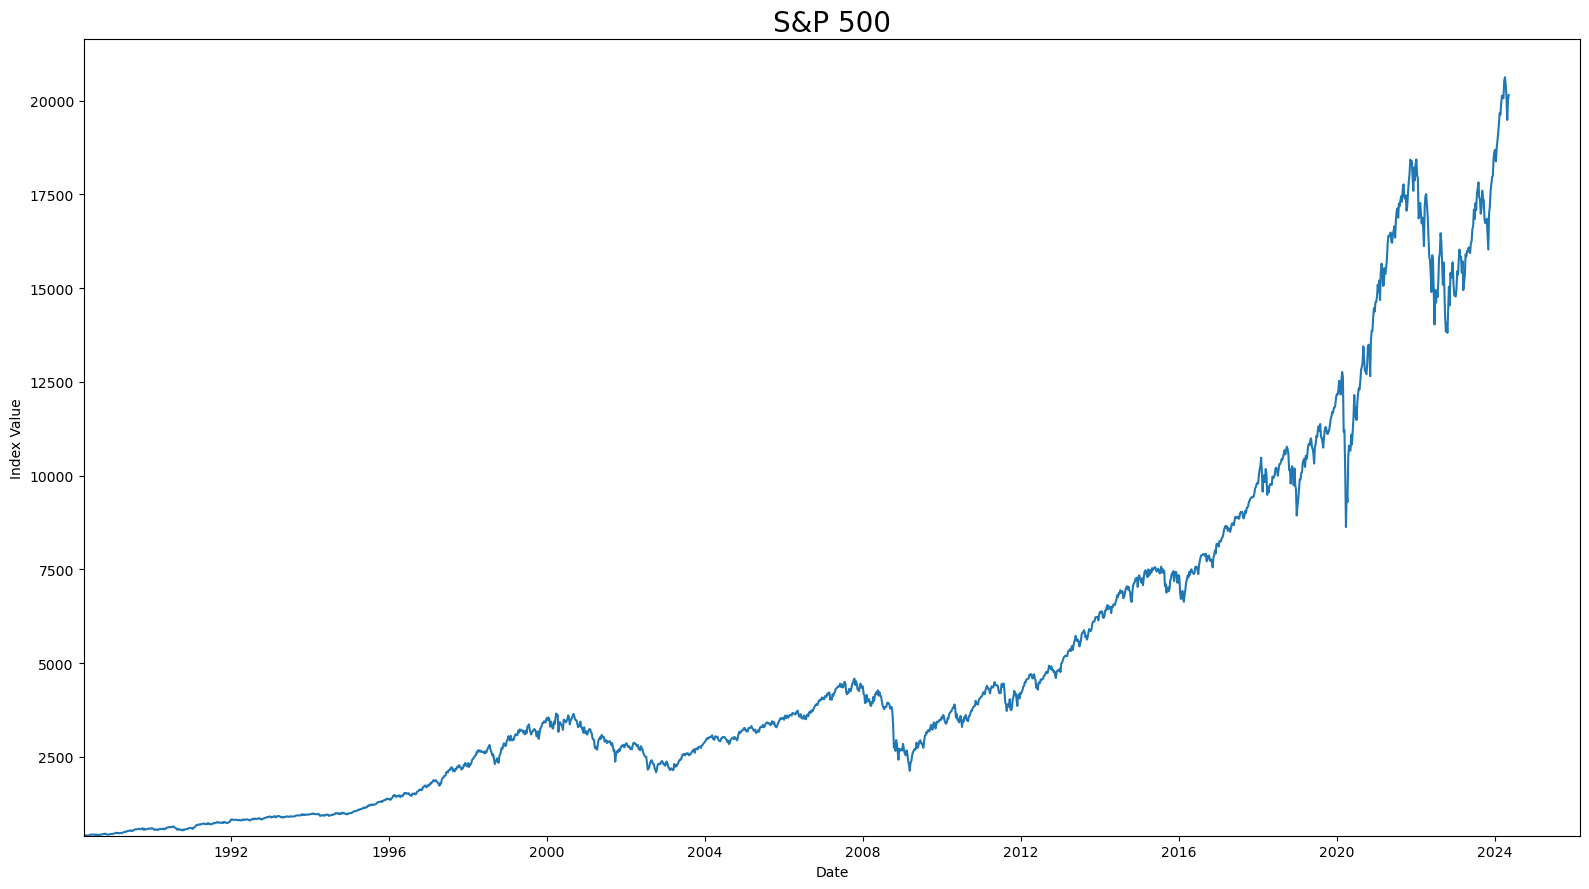

In [5]:
plot_column(dataset=data,
            column = configuration.target_column, 
            title = configuration.target_name, 
            y_label = "Index Value",
            output_path=configuration.output_path + "plots/analysis/")

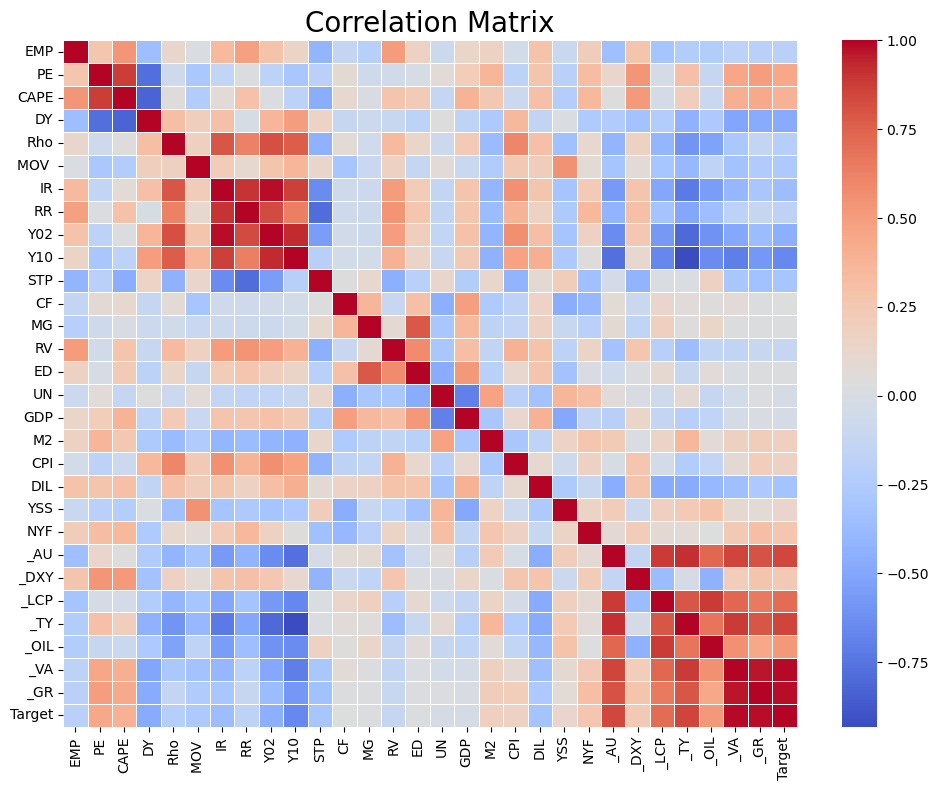

In [6]:
from sklearn.linear_model import LinearRegression

# note that the first column is the date column
temp = data.copy(deep=True)

selection = []

look_ahead = 13
temp['Target'] = data[configuration.target_column].shift(look_ahead)
temp.dropna(axis = 0, inplace = True)


temp.drop(selection + [configuration.target_column, configuration.date_column] , axis = 1, inplace=True)

corr_matrix = temp.corr()
corr_matrix_column = corr_matrix[['Target']].sort_values(by='Target', ascending = False, key = lambda x: abs(x))


plot_correlation_matrix(matrix = corr_matrix, 
                        title = 'Correlation Matrix', 
                        output_path = configuration.output_path + "plots/analysis/")


In [7]:
corr_matrix_column.rename(columns = {'Target': 'Correlation'}, inplace=True)
corr_matrix_column.drop("Target", axis = 0, inplace = True)

In [8]:
corr_matrix_column

,Correlation
_VA,0.988013
_GR,0.982353
_TY,0.850960
_AU,0.843944
_LCP,0.705827
Y10,-0.654598
_OIL,0.521403
DY,-0.475141
Y02,-0.444747
PE,0.442502


In [9]:
corr_matrix_column.rename(columns = {'index': 'Feature'}, inplace=True)
corr_matrix_column.to_csv(configuration.output_path + "/feature_selection/Correlations.csv", index = False, encoding = 'utf-8', sep = ',')

corr_matrix_column

,Correlation
_VA,0.988013
_GR,0.982353
_TY,0.850960
_AU,0.843944
_LCP,0.705827
Y10,-0.654598
_OIL,0.521403
DY,-0.475141
Y02,-0.444747
PE,0.442502
